Hi, so I have not yet finished this assignment. I will finish it by Sunday at 9 am though. Sorry.

# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)

You end up with 0 missing values.

In [3]:
AIRBNB = pd.read_csv('../data/airbnb_NYC.csv', encoding='latin1')
AIRBNB['Price'] = AIRBNB['Price'].str.replace(',','')
AIRBNB['Price'] = AIRBNB['Price'].astype(int)
AIRBNB['Price'].isna().sum()

np.int64(0)

2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.

76% of `subject_injury` values are missing. "Firearm" and "Less lethal projectile" `force_type`s always have a corresponding non-nan `subject_injury` value. "Baton" has 2 nan values and (the least for a single `force_type`), and "Bodily force" has 7051 nan values (the most for a single `force_type`).

In [4]:
MNPOLICE = pd.read_csv('../data/mn_police_use_of_force.csv')
MNPOLICE['subject_injury'].isna().sum() / MNPOLICE.shape[0] # proportion missing

np.float64(0.7619342359767892)

In [5]:
# print the force types that are never nan
forceTypesWhenNan = MNPOLICE[MNPOLICE['subject_injury'].isna()]['force_type'].unique()
allForceTypes = MNPOLICE['force_type'].unique()
for forceType in allForceTypes:
    if forceType not in forceTypesWhenNan: print(forceType)

Firearm
Less Lethal Projectile


In [6]:
nas = MNPOLICE[MNPOLICE['subject_injury'].isna()]
for forceType in allForceTypes:
    print(forceType, '—', nas[nas['force_type'] == forceType].shape[0])

Bodily Force — 7051
Chemical Irritant — 1421
Taser — 985
Improvised Weapon — 74
Gun Point Display — 27
Police K9 Bite — 31
Baton — 2
Firearm — 0
Less Lethal Projectile — 0
Maximal Restraint Technique — 170
Less Lethal — 87


In [7]:
MNPOLICE = MNPOLICE.fillna({'subject_injury': 'Missing'})
MNPOLICE['subject_injury'].unique()

array(['Missing', 'No', 'Yes'], dtype=object)

3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.

In [8]:
METABRIC = pd.read_csv('../data/metabric.csv')
METABRIC['Overall Survival Status'] = METABRIC['Overall Survival Status'].replace('0:LIVING', '0')
METABRIC['Overall Survival Status'] = METABRIC['Overall Survival Status'].replace('1:DECEASED', '1')
METABRIC['Overall Survival Status'] = METABRIC['Overall Survival Status'].astype(int)
METABRIC['Overall Survival Status'].unique()

array([0, 1])

4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

There are 8323 missing values of `Review Scores Rating`. This might impact my results because it might under or overrepresent the review scores of certain places. Imputing missing values as the median means that many properties are going to be regarded as just average. However, in acutuality, a reasonable amount of those are probably better than average and a reasonable amount are worse than average. In other words, imputing the median could lead to bias towards the middle.

In [9]:
AIRBNB['Review Scores Rating'].isna().sum()

np.int64(8323)

In [10]:
AIRBNB2 = AIRBNB.copy()
AIRBNB2 = AIRBNB2.fillna({'Review Scores Rating': AIRBNB2['Review Scores Rating'].median()})
AIRBNB2['Review Scores Rating'].isna().sum()

np.int64(0)

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [ ]:
#1
# read_execel works
SHARKS = pd.read_excel('../data/GSAF5.xls')

#2
SHARKS.dropna(axis='columns', how='all', inplace=True)
SHARKS = SHARKS.drop(columns=['Unnamed: 21', 'Unnamed: 22'])

SHARKS.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Fatal Y/N,Time,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Y,?,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,N,1100hrs,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,N,1815hrs,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,N,0830hrs,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,N,1145hrs,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN


3. Each observation is one shark attack. It includes info about the location, the type of shark, the activity of the person attacked, etc. This affects my choices in cleaning the data because it means that I shouldn't drop too many rows (eg. for having missing values). I don't want to lose too many shark attacks.

In [12]:
# 4

# code to find weird things
SHARKS['Year'].unique() # weird years are 77, 5, and 0
yearIsZero = SHARKS[SHARKS['Year'] == 0]
yearIsZero = yearIsZero[yearIsZero['Date'].str.contains('B')]
yearIsZero = yearIsZero[yearIsZero['Date'].str.contains('C')]
yearIsZero

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Fatal Y/N,Time,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order
6945,Ca. 214 B.C.,0.0,Unprovoked,NaN,Ionian Sea,NaN,Ascending from a dive,"Tharsys, a sponge diver",M,NaN,...,Y,NaN,NaN,"Reported by Greek poet, Leonidas of Tarentum (...",214BC-Tharsys.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,214BC-Tharsus,214BC,130.0
6946,Ca. 336.B.C..,0.0,Unprovoked,GREECE,Piraeus,In the haven of Cantharus,Washing his pig in preparation for a religious...,A candidate for initiation,M,NaN,...,Y,NaN,NaN,Plutarch (45 - 125 A.D.) in Life of Phoecion (...,336-BC-Carnathus.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,336BC-Csrnathus,336BC,129.0
6947,Ca. 493 B.C.,0.0,Sea Disaster,GREECE,Off Thessaly,NaN,Shipwrecked Persian Fleet,males,M,NaN,...,Y,NaN,NaN,Herodotus (485 - 425 B.C.),493BC-PersianFleet.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,493BC-PersianFleet,493BC,128.0
6948,Ca. 725 B.C.,0.0,Sea Disaster,ITALY,Tyrrhenian Sea,Krater found during excavations at Lacco Ameno...,Shipwreck,males,M,NaN,...,Y,NaN,NaN,"V.M. Coppleson (1958), p.262, et al",725BC-vase.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,725BC-vase,725/BC,127.0
6949,Ca. 1010 BC,0.0,NaN,JAPAN,NaN,Archeological site,NaN,male,M,NaN,...,Y,NaN,NaN,J.A. WhiteJ.,1010BC-Japan.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1010BC-Japan,1010BC,126.0
6950,Ca 4000 BC,0.0,NaN,PERU,Paloma,Archeological site,NaN,male,M,17,...,Y,NaN,NaN,J. Quilter,4000BC-Peru.jpg,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,4000.BC-Peru,4000BC,125.0


The range of values is from 2026 all the way back to 5. It also includes some incidents from BC years.

In [13]:
# code to fix weird things

# 77 is acceptable, it is for an attack in 77 AD
# 5 is also acceptable, it is for an attack in 5 AD

# 0 is for a bunch of things :D no dates, ranges, questions, etc.
# for simplicity, I change all these into nan values
SHARKS['Year'] = SHARKS['Year'].replace(0, np.nan)
SHARKS['Year'].unique()

array([2026., 2016., 2025., 2024., 2023., 2022., 2021., 2020., 2019.,
       2018., 2017.,   nan, 2015., 2014., 2013., 2012., 2011., 2010.,
       2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002., 2001.,
       2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994., 1993.,
       1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986., 1985.,
       1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976., 1975.,
       1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966., 1965.,
       1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957., 1956.,
       1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948., 1848.,
       1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940., 1939.,
       1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931., 1930.,
       1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922., 1921.,
       1920., 1919., 1918., 1917., 1916., 1915., 1914., 1913., 1912.,
       1911., 1910., 1909., 1908., 1907., 1906., 1905., 1904., 1903.,
       1902., 1901.,

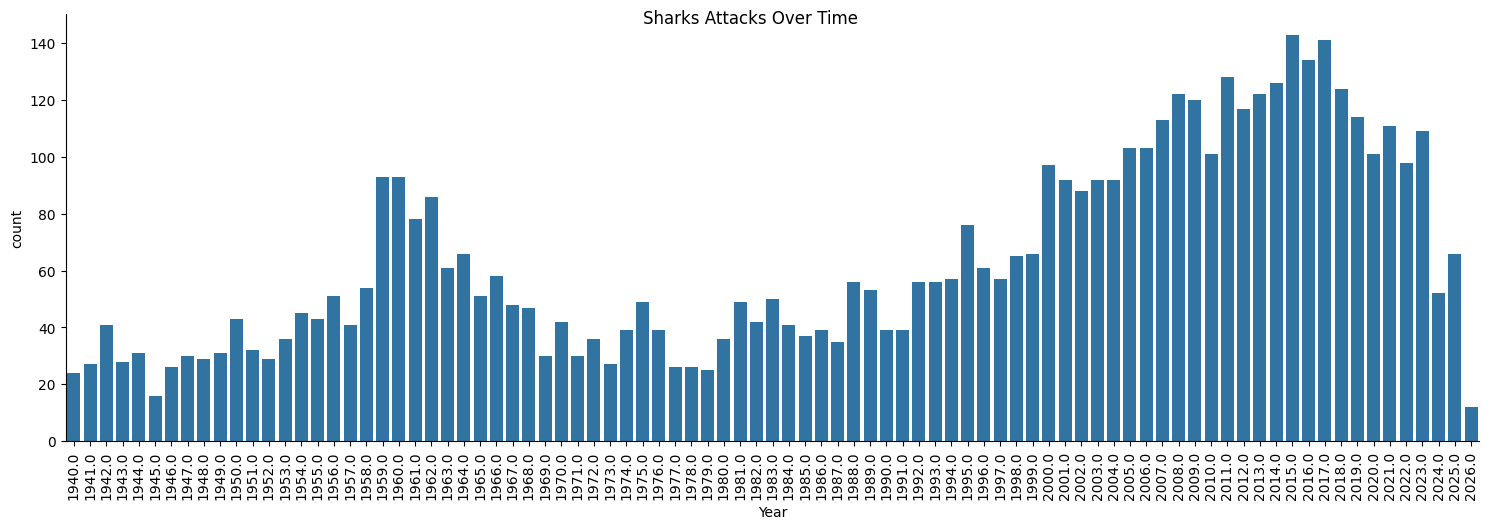

In [47]:
# filter rows to only include years > 1940
SHARKS2 = SHARKS.copy()
SHARKS2 = SHARKS[SHARKS['Year'] >= 1940]

# plot to see trend over time
counts = SHARKS2['Year'].value_counts().to_frame()
sns.catplot(counts, kind='bar', x='Year', y='count', aspect=3)
plt.xticks(rotation=90)
plt.suptitle("Sharks Attacks Over Time")
plt.show()


Sharks attacks have generally increased since 1940.

In [45]:
# 5

# code to find and fix weird things
# anything that is weird becomes nan for simplicity
agesInData = SHARKS2['Age'].unique()
weirdAges = []
for age in agesInData:
    if not str(age).isdigit():
        weirdAges.append(age)

SHARKS3 = SHARKS2.copy()
SHARKS3['Age'] = SHARKS3['Age'].replace(weirdAges, np.nan)
SHARKS3['Age'] = SHARKS3['Age'].astype(float)
SHARKS3['Age'].unique()

array([13., nan, 39., 11., 27., 12., 26., 56., 55., 24., 25., 61., 40.,
       14., 54., 48., 57.,  8., 63.,  9., 19.,  7., 85., 69., 18., 66.,
       21., 37., 16., 20., 42., 45., 30., 29., 35., 58., 17., 36., 23.,
       28., 38., 68., 33., 15., 41., 43., 49., 46., 65., 64., 32., 10.,
       62., 22., 52., 44., 47., 59., 50., 34., 77., 60., 73., 67.,  6.,
       53., 51., 31., 71., 75., 70.,  4., 74.,  3., 82., 72.,  5., 86.,
       84., 87.,  1., 81., 78.])

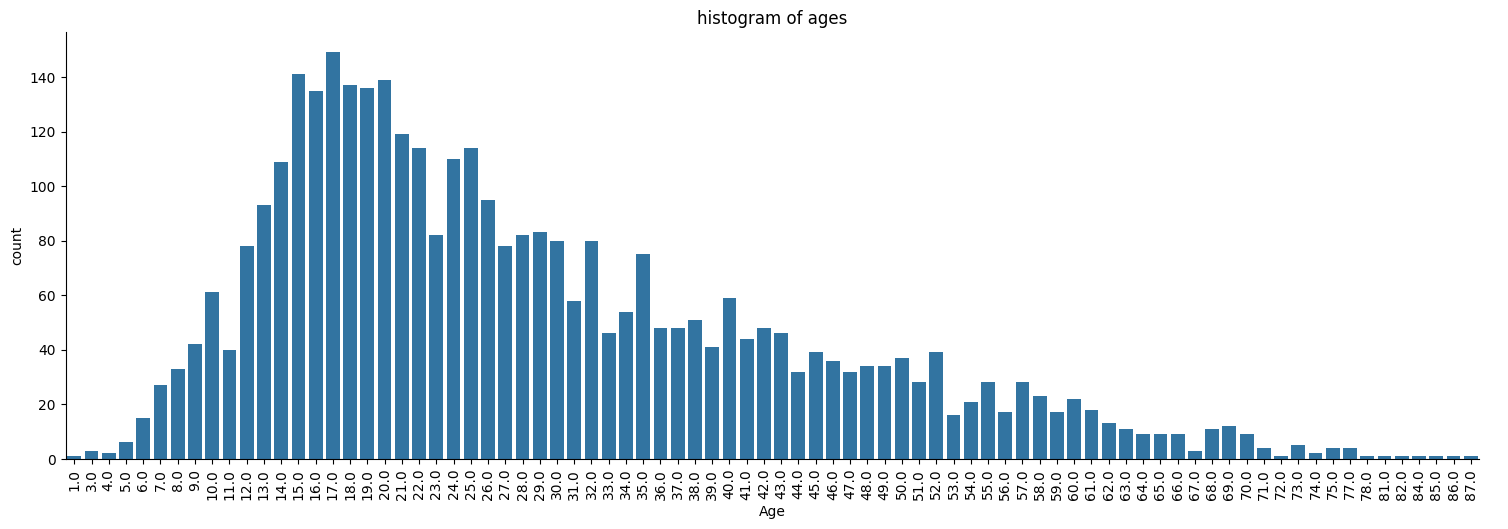

In [ ]:
# plot as histogram

sns.catplot(SHARKS3.sort_values('Age'), x='Age', kind='count', aspect=3)
plt.xticks(rotation=90)
plt.title('histogram of ages')
plt.show()

In [ ]:
# 6

# code to find weird things
SHARKS4 = SHARKS3.copy()
SHARKS4['Type'].unique()


array(['Unprovoked', 'Provoked', 'Questionable', 'unprovoked',
       ' Provoked', 'Watercraft', 'Sea Disaster', nan, '?', 'Unconfirmed',
       'Unverified', 'Invalid', 'Under investigation', 'Boat'],
      dtype=object)

In [ ]:
# code to fix weird things
toUnknown = ['Questionable', 'Watercraft', 'Sea Disaster', np.nan, '?', 'Unconfirmed', 'Unverified', 'Invalid', 'Under investigation', 'Boat']
SHARKS4['Type'] = SHARKS4['Type'].replace(toUnknown, 'Unknown')
SHARKS4['Type'] = SHARKS4['Type'].replace('unprovoked', 'Unprovoked')
SHARKS4['Type'] = SHARKS4['Type'].replace(' Provoked', 'Provoked')
SHARKS4['Type'].unique()

array(['Unprovoked', 'Provoked', 'Unknown'], dtype=object)

In [ ]:
# find proportion unprovoked
len(SHARKS4[SHARKS4['Type'] == 'Unprovoked']) / len(SHARKS4['Type'])

0.7450343084145901

About 74% of the shark attacks were unprovoked.

In [73]:
# 7 

# code to find weird things
SHARKS5 = SHARKS4.copy()
SHARKS5['Fatal Y/N'] = SHARKS5['Fatal Y/N'].str.strip()
SHARKS5['Fatal Y/N'].unique()

array(['Y', 'N', 'F', 'M', nan, 'n', 'Nq', 'UNKNOWN', 'Y x 2'],
      dtype=object)

In [ ]:
# code to fix weird things
toY = ['F', 'Y x 2']
toN = ['n', 'Nq']
toUnknown2 = ['M', np.nan, 'UNKNOWN']
SHARKS5['Fatal Y/N'] = SHARKS5['Fatal Y/N'].replace(toY, 'Y')
SHARKS5['Fatal Y/N'] = SHARKS5['Fatal Y/N'].replace(toN, 'N')
SHARKS5['Fatal Y/N'] = SHARKS5['Fatal Y/N'].replace(toUnknown2, 'Unknown')
SHARKS5['Fatal Y/N'].unique()

array(['Y', 'N', 'Unknown'], dtype=object)

In [127]:
# 8

types = SHARKS5['Type'].unique()

fatalityByType = pd.DataFrame({
    'type': types,
    'percentFatal': [0.0, 0.0, 0.0]
})
fatalityByType = fatalityByType.set_index('type')

for type in types:
    fatalColumn = SHARKS5[SHARKS5['Type'] == type]['Fatal Y/N']
    percentFatal = ( len(fatalColumn[fatalColumn == 'Y']) / len(fatalColumn) ) * 100
    fatalityByType.loc[type, 'percentFatal'] = percentFatal
    
fatalityByType

,percentFatal
type,
Unprovoked,16.892874
Provoked,2.485660
Unknown,14.173228


Unprovoked attacks are more likely to be fatal than provoked attacks. This is the opposite of what I would have suspected. Maybe this is because some of the unknown attacks should have been marked as provoked.

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?

  This paper is about the concept of "tidy data" which is data where each variable is a column, each observation is a row, and each type of observational unit is a table. Tidy data makes it easier to work with data.

  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? 

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
6. Which giftors provide the most money, in total? 

**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$. 

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?